In [1]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x) 
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.5
np.random.seed(1)
weights_input_hidden = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
weights_hidden_output = 2 * np.random.rand(hidden_neurons, output_neurons) - 1
bias_hidden = np.zeros((1, hidden_neurons))
bias_output = np.zeros((1, output_neurons))
for epoch in range(epochs):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    error = y - final_output
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")
    d_output = error * sigmoid_derivative(final_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
print("Final output after training:")
print(final_output.round())

Epoch 0, Error: 0.4993115461156098
Epoch 1000, Error: 0.14014506815954347
Epoch 2000, Error: 0.05327964300268036
Epoch 3000, Error: 0.037809672816065024
Epoch 4000, Error: 0.030679375964888487
Epoch 5000, Error: 0.026405146117187923
Epoch 6000, Error: 0.023492200189943982
Epoch 7000, Error: 0.02134888571148472
Epoch 8000, Error: 0.01968924702739116
Epoch 9000, Error: 0.01835637635507778
Final output after training:
[[0.]
 [1.]
 [1.]
 [0.]]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


C:\Users\student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3971 - loss: 1.6572 - val_accuracy: 0.5642 - val_loss: 1.2391
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6105 - loss: 1.1119 - val_accuracy: 0.6465 - val_loss: 1.0075
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6652 - loss: 0.9546 - val_accuracy: 0.6663 - val_loss: 0.9652
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7056 - loss: 0.8584 - val_accuracy: 0.6801 - val_loss: 0.9329
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7292 - loss: 0.7777 - val_accuracy: 0.6965 - val_loss: 0.8938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


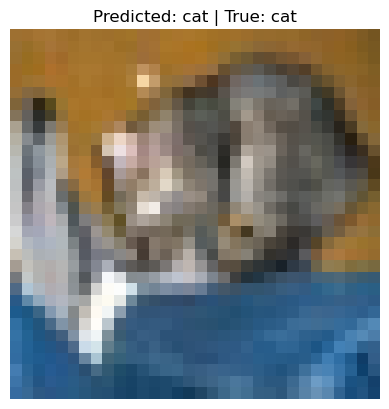

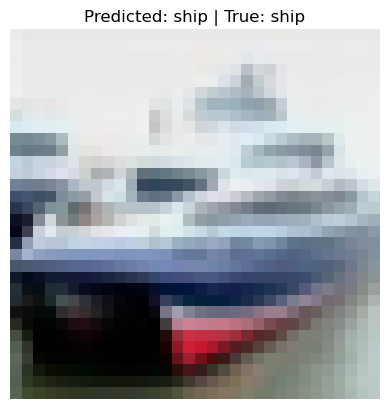

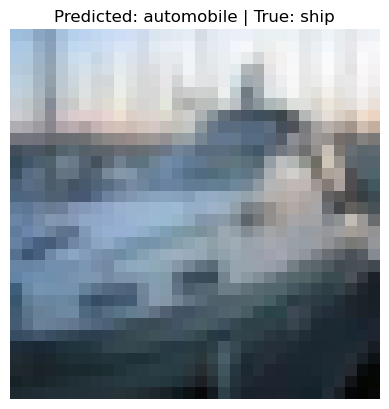

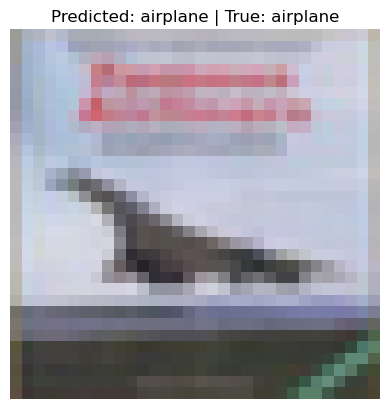

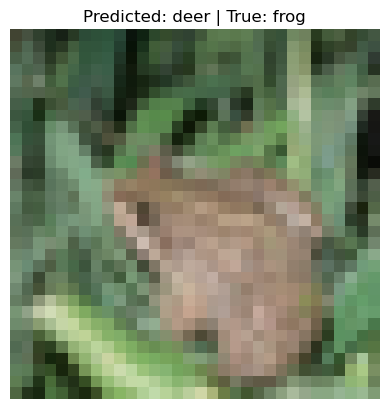

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

num_images = 5
predictions = model.predict(x_test[:num_images])
for i in range(num_images):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | True: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3833 - loss: 1.7013 - val_accuracy: 0.5937 - val_loss: 1.1774
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6024 - loss: 1.1295 - val_accuracy: 0.6372 - val_loss: 1.0495
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6578 - loss: 0.9854 - val_accuracy: 0.6661 - val_loss: 0.9744
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6913 - loss: 0.8837 - val_accuracy: 0.6763 - val_loss: 0.9295
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7160 - loss: 0.8156 - val_accuracy: 0.6845 - val_loss: 0.9249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


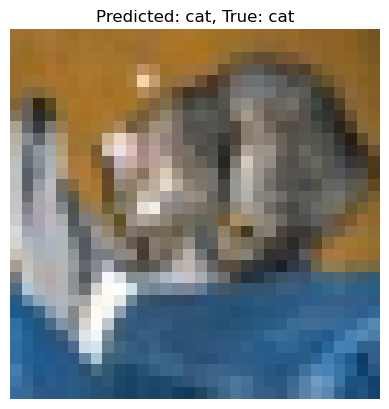

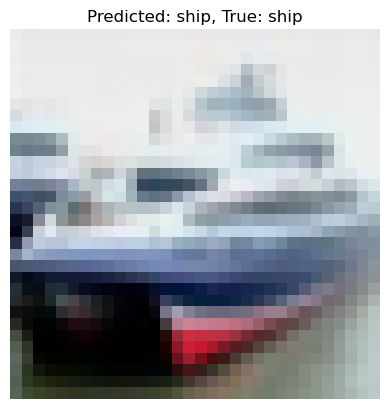

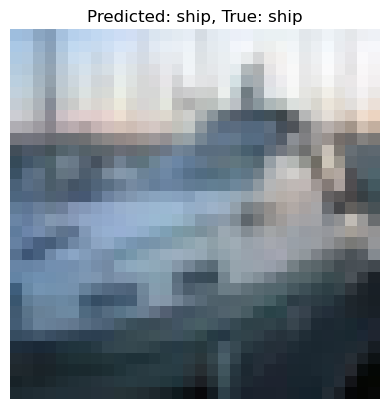

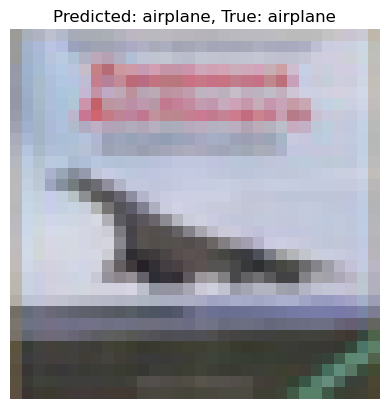

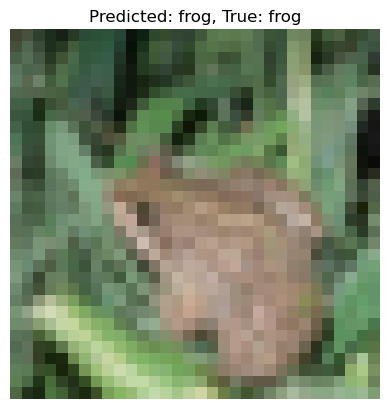

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

In [6]:
!pip install torch
!pip install torchvision

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 10.3 MB/s eta 0:00:00


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3) 
        self.pool = nn.MaxPool2d(2, 2)   
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 6 * 6, 64)  
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  
        x = self.pool(torch.relu(self.conv2(x))) 
        x = x.view(-1, 64 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(5):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} loss: {running_loss / len(trainloader):.3f}")

print('Finished Training')
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
images = images.cpu()  
labels = labels.cpu()
predicted = predicted.cpu()
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
for i in range(5):
    plt.figure()
    imshow(images[i])
    plt.title(f"Predicted: {classes[predicted[i]]}, True: {classes[labels[i]]}")
    plt.show()


100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [01:38<00:00, 1.73MB/s]


Epoch 1 loss: 1.497
Epoch 2 loss: 1.132
Epoch 3 loss: 0.974
Epoch 4 loss: 0.881
Epoch 5 loss: 0.804
Finished Training


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


C:\Users\student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9005 - loss: 0.3324 - val_accuracy: 0.9834 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0445 - val_accuracy: 0.9884 - val_loss: 0.0344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9890 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9902 - val_loss: 0.0294
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0361
Test accuracy: 0.990
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


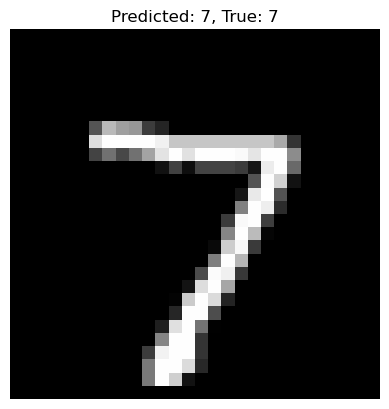

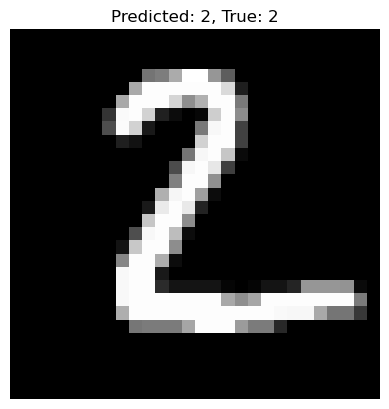

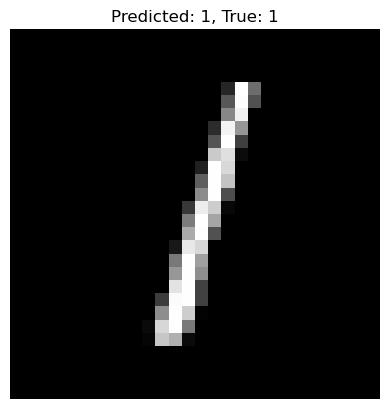

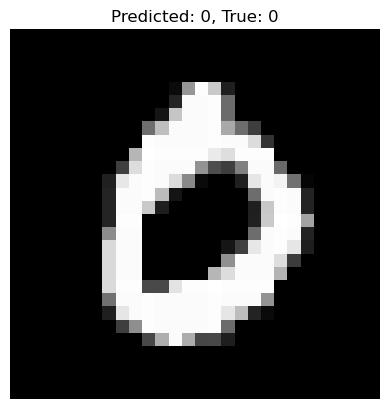

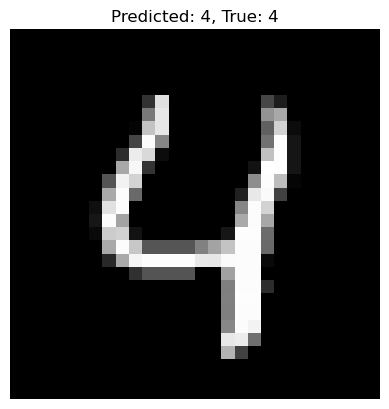

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., tf.newaxis] 
x_test = x_test[..., tf.newaxis]
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
import numpy as np
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 224 
batch_size = 32
num_classes = 2 
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'  # integer labels
)

validation_generator = val_datagen.flow_from_directory(
    'data/validation',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)
model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0
    return img_array
img_path = 'path_to_monkey_image.jpg'
img = prepare_image(img_path)
pred = model.predict(img)
class_index = np.argmax(pred)
print(f'Predicted class: {class_index} (e.g. 0=monkey, 1=not monkey)')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/train'